In [1]:
import numpy as np
from numpy import heaviside as th
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm
import pickle

## Integration method 1

[0.0004581324179765894, 0.004545454545454545, 8.190818181818182] 
 [0.00030046913060475746, 4.545454545454545e-05, 1.1829130434782609]
Simulation of 0.02s.


Draw plots: 100%|██████████| 3/3 [02:31<00:00, 50.53s/it]


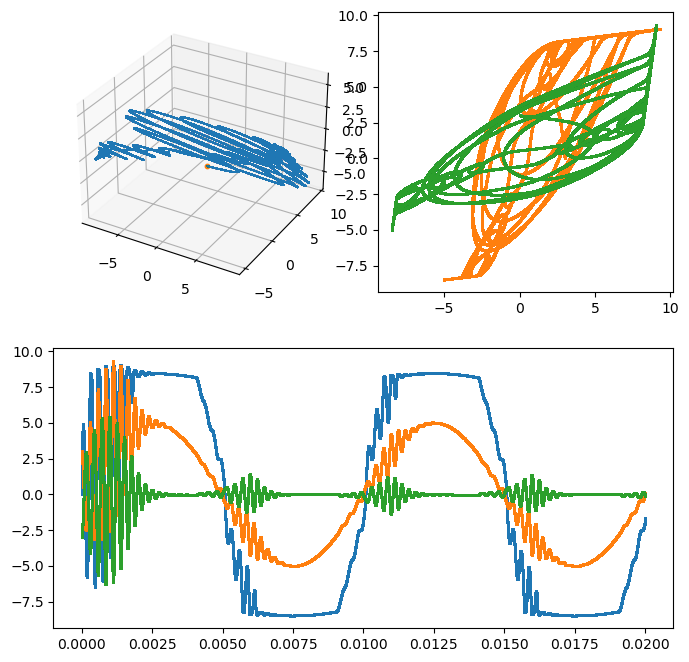

In [7]:
# Parameters 

R = 1410
C1 = 10e-9
C2 = 100e-9
L = 15e-3

R2,R3 = 220,2200
R4,R6 = 22000,3300
A = 1000; E = 9

F,freq = 5,100

interior = [((A-1)*R2+R3)/(R2*(R2+(1+A)*R3))
            ,1/R2,
            (R2+(1+A)*R3)/(A*(R2+R3))*E]
exterior = [((A-1)*R4+R6)/(R4*(R4+(1+A)*R6))
            ,1/R4
            ,(R4+(1+A)*R6)/(A*(R4+R6))*E]

print(interior,"\n",exterior)

def NIC(x,a,b,B):
    g = -a*x*(th(x+B,1)-th(x-B,1)) # Centre
    g += (b*x+(a+b)*B)*th(-x-B,1) # Lefterior
    g += (b*x-(a+b)*B)*th(x-B,1) # Righterior
    return g

def Chua(x,a1,b1,B1,a2,b2,B2):
    return NIC(x,a1,b1,B1)+NIC(x,a2,b2,B2)

# Numerical interation method 1

dt = 2e-9; duration = 1e7
print(f"Simulation of {dt*duration}s.")

X,Y,Z = [0],[3],[0]
for i in tqdm(range(int(duration))):
    t = i*dt

    xi,yi,zi = X[-1],Y[-1],Z[-1]

    dx = (yi-xi)/R-Chua(xi,*interior,*exterior)
    dy = (xi-yi)/R+zi
    dz = -yi+F*np.sin(2*np.pi*freq*t)
    # dz = -yi
    X.append(xi+dx/C1*dt);Y.append(yi+dy/C2*dt);Z.append(zi+dz/L*dt)

t = [t*dt for t in range(int(duration+1))]

Z = np.array(Z);t = np.array(t)
Z = (Z[:-1]-Z[1:])/(t[:-1]-t[1:])*L # Time differential
X = X[:-1]; Y = Y[:-1]; t = t[:-1]

# Plot the solutions

"""
If the plot that this code block shows is not pleasing for you, don't 
repeat the simulation in this code block, but instead move on to the b
lock below and use the code there to manipulate the data. 
Kachow
"""

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = fig.add_subplot(grid[0,0], projection='3d')
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

axs1.scatter(X,Y,Z
               ,s=0.003
               )
axs1.scatter(X[0],Y[0],Z[0]
               ,s=10
               )
data = [X,Y,Z]
for i in tqdm(range(3),desc="Draw plots"):
    axs2.scatter(data[i%2],data[(i+1)%2],s=0.3)
    axs3.scatter(t, data[i],s=0.3)

In [14]:
# Save the simulated data. 
"""
Select the code below and press "ctrl+/" to active code block.
"""

# data = {"param": 
#         {"R":R,"C1":C1,"C2":C2,"L":L
#          ,"R2":R2,"R3":R3,"R4":R4,"R6":R6,"E":E
#          ,"F":F,"f":freq},
#          "simul": {"dt":dt,"dur":duration}
#          ,"X":X,"Y":Y,"Z":Z,"t":t}

# handle = open(f"sim_R{R}.pkl", 'wb')
# pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
# handle.close()

# Plot the data

ini = 0
end = int(len(Y))
spac = 100

Xspa = X[ini:end:spac]
Yspa = Y[ini:end:spac]
Zspa = Z[ini:end:spac]

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = fig.add_subplot(grid[0,0], projection='3d')
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

axs1.scatter(X,Y,Z
               ,s=0.003
               )
axs1.scatter(X[0],Y[0],Z[0]
               ,s=10
               )
data = [X,Y,Z]
for i in tqdm(range(3),desc="Draw plots"):
    axs2.scatter(data[i%2],data[(i+1)%2],s=0.3)
    axs3.scatter(t, data[i],s=0.3)

# ini = 0
# end = int(len(Y))
# spac = 100
# # plt.plot(X[::500],scaled[::500])
# plt.scatter(t[ini:end:spac],X[ini:end:spac],s=0.3)
# plt.scatter(t[ini:end:spac],Y[ini:end:spac],s=0.3)
# plt.scatter(t[ini:end:spac],Z[ini:end:spac],s=0.3)

Draw plots:  33%|███▎      | 1/3 [01:14<02:28, 74.38s/it]


KeyboardInterrupt: 

## Integration method 2

by solve_ivp from scipy

[0.0004581324179765894, 0.004545454545454545, 2.730272727272727] 
 [0.00030046913060475746, 4.545454545454545e-05, 0.3943043478260869]
2353 2354


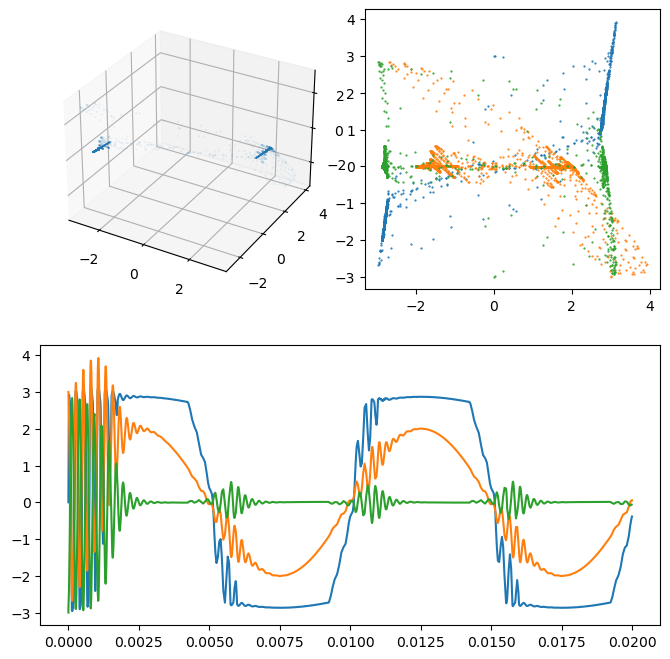

In [175]:
from scipy.integrate import solve_ivp

R = 1410
C1 = 10e-9
C2 = 100e-9
L = 15e-3

R2,R3 = 220,2200
R4,R6 = 22000,3300
A = 1000; E = 3

F,freq = 2,100

interior = [((A-1)*R2+R3)/(R2*(R2+(1+A)*R3))
            ,1/R2,
            (R2+(1+A)*R3)/(A*(R2+R3))*E]
exterior = [((A-1)*R4+R6)/(R4*(R4+(1+A)*R6))
            ,1/R4
            ,(R4+(1+A)*R6)/(A*(R4+R6))*E]

def NIC(x,a,b,B):
    g = -a*x*(th(x+B,1)-th(x-B,1)) # Centre
    g += (b*x+(a+b)*B)*th(-x-B,1) # Lefterior
    g += (b*x-(a+b)*B)*th(x-B,1) # Righterior
    return g

def Chua(x,a1,b1,B1,a2,b2,B2):
    return NIC(x,a1,b1,B1)+NIC(x,a2,b2,B2)

# Numerical integration by solve_ivp

def sys_DE(t,w,inte,exte):
    """
    Defines Chua's equations

    Arguments:
        w :  vector of the state variables:
                  w = [x,y,z]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2,b1,b2]
    """
    x,y,z = w
    dx = ((y-x)/R-Chua(x,*inte,*exte))/C1
    dy = ((x-y)/R+z)/C2
    dz = (-y+F*np.sin(2*np.pi*freq*t))/L
    return dx,dy,dz

xyz0 = [-0,3,0]
solution = solve_ivp(sys_DE,[0,0.02],xyz0,first_step=1e-7,
                     args=[interior,exterior])

x_sol = solution.y[0]
y_sol = solution.y[1]
z_sol = solution.y[2]

time = solution.t
z_sol = (z_sol[:-1]-z_sol[1:])/(time[:-1]-time[1:])*L

x_sol = x_sol[:-1]
y_sol = y_sol[:-1]
time = time[:-1]

# Plot the solutions

fig = plt.figure(figsize=(8,8))
grid = gs.GridSpec(2,2,wspace=0.1,)

axs1 = fig.add_subplot(grid[0,0], projection='3d')
axs2 = plt.subplot(grid[0,1])
axs3 = plt.subplot(grid[1,:])

axs1.scatter(x_sol,y_sol,z_sol
               ,s=0.003
               )

axs2.scatter(x_sol,y_sol,s=0.3)
axs2.scatter(y_sol,z_sol,s=0.3)
axs2.scatter(x_sol,z_sol,s=0.3)

axs3.plot(time, x_sol)
axs3.plot(time, y_sol)
axs3.plot(time, z_sol)

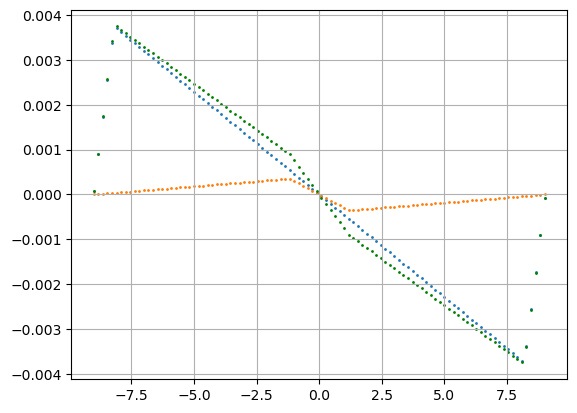

In [73]:
# Check Diode function

Vin = np.linspace(-9,9,100)
Y1 = [NIC(x,*interior) for x in Vin]
Y2 = [NIC(x,*exterior) for x in Vin]
Y0 = [Chua(x,*interior,*exterior) for x in Vin]

for Vout in [Y1,Y2]:
    plt.scatter(Vin,Vout
             ,s=1
             )

plt.scatter(Vin,Y0
            ,s=1
            ,color="green")
plt.grid()